In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [22]:
df=pd.read_csv('../input/sp-500-companies-with-financial-information/financials.csv')

In [23]:
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [24]:
df.rename(columns = {'52 Week Low':'52 week High','52 Week High':'52 week Low'}, inplace = True)


In [25]:
df

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 week High,52 week Low,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [26]:
df = df.drop(columns = "SEC Filings")

In [27]:
df.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 week High      0
52 week Low       0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
dtype: int64

In [28]:
df=df.dropna()

In [29]:
df.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 week High      0
52 week Low       0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
dtype: int64

In [111]:
df.describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 week High,52 week Low,Market Cap,EBITDA,Price/Sales,Price/Book
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000,495.000000
mean,104.106505,24.654303,1.901477,3.815192,122.985808,83.812053,4.937665e+10,3.576406e+09,3.953316,14.498687
std,135.372594,40.767081,1.541039,5.529133,156.480433,106.497350,9.069162e+10,6.880742e+09,3.485055,89.838923
min,2.820000,-251.530000,0.000000,-24.620000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.355000,15.350000,0.795585,1.525000,56.350000,38.520000,1.274957e+10,7.708980e+08,1.631733,2.020000
50%,73.920000,19.450000,1.790190,2.890000,86.680000,62.850000,2.143378e+10,1.613000e+09,2.880285,3.400000
75%,116.735000,25.770000,2.797169,5.120000,140.315000,96.610000,4.499315e+10,3.657500e+09,4.728857,6.130000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


In [112]:
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 week High,52 week Low,Market Cap,EBITDA,Price/Sales,Price/Book
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62


In [161]:
sectors = df.groupby(["Sector"]).size().reset_index(name = "Number of companies")

In [162]:
sectors

,Sector,Number of companies
0,Consumer Discretionary,82
1,Consumer Staples,33
2,Energy,30
3,Financials,68
4,Health Care,59
5,Industrials,64
6,Information Technology,70
7,Materials,25
8,Real Estate,33
9,Telecommunication Services,3


In [167]:
top5sectors=sectors.sort_values(by = "Number of companies", ascending = False).head(5)
bottom5sectors=sectors.sort_values(by = "Number of companies", ascending = True).head(5)

In [168]:
display(top5sectors)

,Sector,Number of companies
0,Consumer Discretionary,82
6,Information Technology,70
3,Financials,68
5,Industrials,64
4,Health Care,59


In [169]:
display(bottom5sectors)

,Sector,Number of companies
9,Telecommunication Services,3
7,Materials,25
10,Utilities,28
2,Energy,30
1,Consumer Staples,33


In [170]:
top5data = df[(df["Sector"] == "Consumer Discretionary")|(df["Sector"] == "Information Technology")|(df["Sector"] == "Financials")|(df["Sector"] == "Industrials")
             |(df["Sector"] == "Health Care")]

In [171]:
top5data

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 week High,52 week Low,Market Cap,EBITDA,Price/Sales,Price/Book
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42


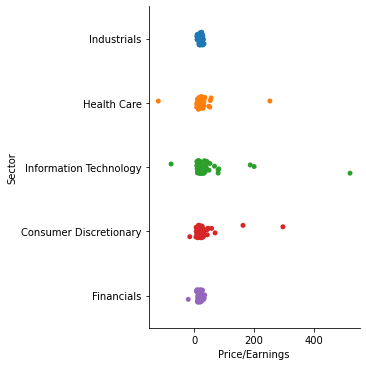

In [184]:
sns.catplot(x ='Price/Earnings', y = 'Sector', data = top5data)

<AxesSubplot:xlabel='Price/Sales', ylabel='Sector'>

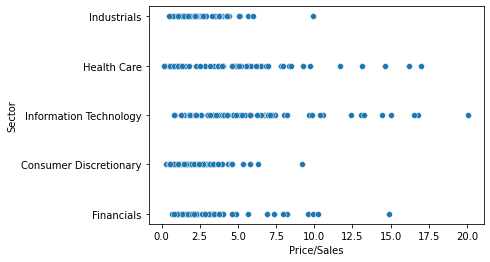

In [183]:
sns.scatterplot(x ='Price/Sales', y = 'Sector', data = top5data)

In [ ]:
top